# Assignment: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [3]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

In [4]:
print(f'This dataset has {len(df.index)} rows')

This dataset has 716326 rows


How many North Atlantic hurricanes are in this dataset?

In [5]:
#### NOTE that there are repeats
dfNAUnique = len(df[df.BASIN == 'NA'].SID.unique())

print(f'This dataset has {dfNAUnique} North Atlantic hurricanes')

This dataset has 2345 North Atlantic hurricanes


### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [6]:
basinUnique = df.BASIN.unique()
basinUnique

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [7]:
subBasinUnique = df.SUBBASIN.unique()
subBasinUnique

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [8]:
natureUnique = df.NATURE.unique()
natureUnique

array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object)

### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [9]:
df = df.rename(columns = {'WMO_WIND':'WIND', 'WMO_PRES':'PRES'})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


### 3) Get the 10 largest rows in the dataset by `WIND`

In [10]:
largest10 = df.nlargest(10, 'WIND')
largest10

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
666142,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
666140,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
666144,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
427655,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
482093,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
552477,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
605764,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [11]:
dfGrouped = df.groupby('SID')
largest10SID = dfGrouped.aggregate(max).nlargest(10, 'WIND')
largest10SID

/tmp/ipykernel_689573/1807220040.py:2: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  largest10SID = dfGrouped.aggregate(max).nlargest(10, 'WIND')


,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
SID,,,,,,,,,,,
2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-24 12:00:00,TS,23.2,-94.0000,185.0,1007.0
1980214N11330,1980,57,NA,NA,ALLEN,1980-08-11 18:00:00,TS,28.9,-30.0000,165.0,1010.0
1935241N23291,1935,46,NA,NA,NaN,1935-09-10 12:00:00,TS,57.0,-31.1196,160.0,996.0
1988253N12306,1988,74,NA,NA,GILBERT,1988-09-20 00:00:00,TS,43.4,-54.0000,160.0,1008.0
1997253N12255,1997,81,EP,MM,LINDA,1997-09-17 18:00:00,TS,23.5,-104.7000,160.0,1007.0
2005289N18282,2005,97,NA,NA,WILMA,2005-10-26 18:00:00,TS,45.5,-52.0000,160.0,1004.0
2019236N10314,2019,52,NA,NA,DORIAN,2019-09-09 00:00:00,TS,51.6,-46.4000,160.0,1011.0
1998295N12284,1998,89,NA,NA,MITCH,1998-11-09 18:00:00,TS,63.5,-5.0000,155.0,1005.0
2005261N21290,2005,80,NA,NA,RITA,2005-09-26 06:00:00,TS,39.5,-69.9000,155.0,1009.0


### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

/tmp/ipykernel_689573/4112160674.py:2: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  largest20SID = dfGrouped.aggregate(max).nlargest(20, 'WIND')


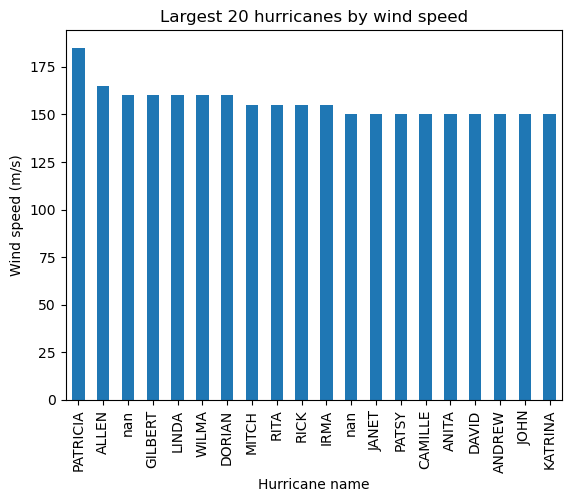

In [12]:
# assuming that we continue to use the data grouped by SID
largest20SID = dfGrouped.aggregate(max).nlargest(20, 'WIND')
plot = largest20SID.WIND.plot(kind = 'bar')
plot.set_title('Largest 20 hurricanes by wind speed')
plot.set_xlabel('Hurricane name')
plot.set_ylabel('Wind speed (m/s)')
plot.set_xticklabels(largest20SID.NAME)

plt.show()

### 6) Plot the count of all datapoints by Basin

as a bar chart

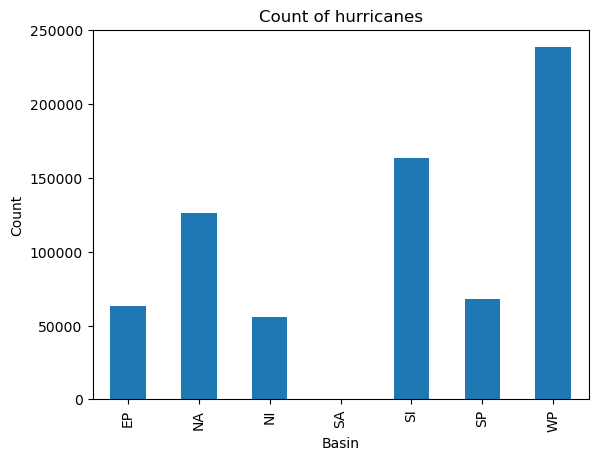

In [13]:
# going to assume here that we don't want the information by hurricane name (i.e., I am not grouping by SID)
plot = df.groupby('BASIN').SID.count().plot(kind = 'bar')
plot.set_title('Count of hurricanes')
plot.set_xlabel('Basin')
plot.set_ylabel('Count')

plt.show()

### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

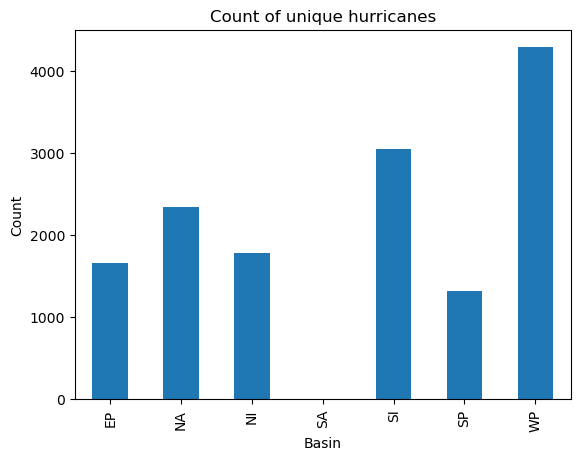

In [14]:
uniqueBasinCanes = df.groupby('BASIN').SID.nunique()
plot = uniqueBasinCanes.plot(kind = 'bar')
plot.set_title('Count of unique hurricanes')
plot.set_ylabel('Count')
plot.set_xlabel('Basin')

plt.show()

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

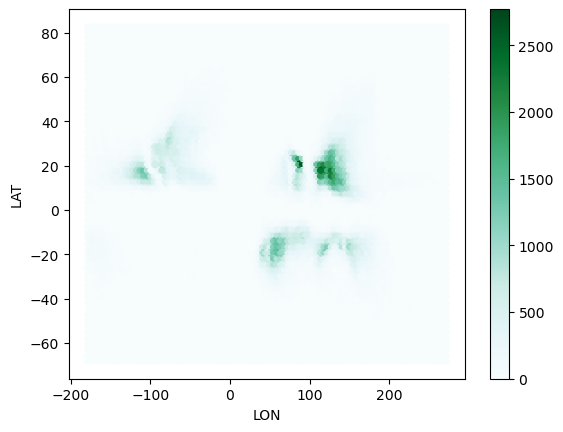

In [15]:
ax = df.plot.hexbin(x = 'LON', y = 'LAT')

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

/tmp/ipykernel_689573/3004461230.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


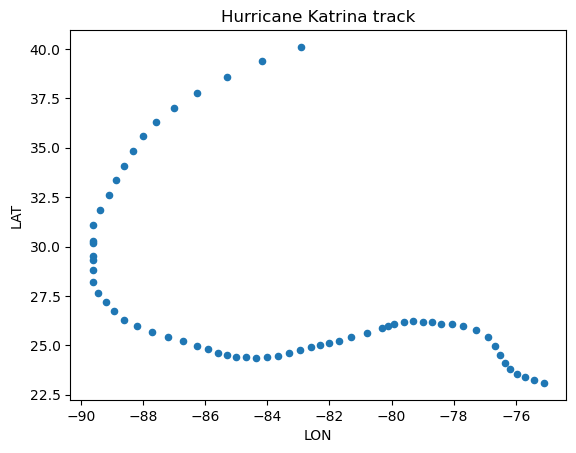

In [16]:
hurricaneName = 'KATRINA'
year = 2005

katrinaSID = df.SID[(df.NAME == hurricaneName) & (df.SEASON == year)].unique()[0]

# selecting only the columns that I need
katrinaData = df[df.SID == katrinaSID][['ISO_TIME', 'LAT', 'LON']]

# plotting
cm = plt.cm.get_cmap('RdYlBu')
plot = katrinaData.plot.scatter('LON', 'LAT')
plot.set_title('Hurricane Katrina track')

plt.show()

Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

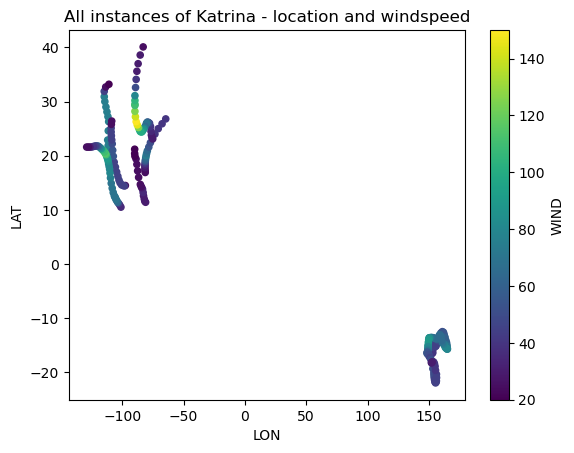

In [17]:
# by get this hurricane's group, I assume it means for all instances of Katrina
dfAllKatrina = df[df.NAME == hurricaneName][['LON', 'LAT', 'WIND']]

plot = dfAllKatrina.plot.scatter('LON', 'LAT', c = 'WIND')
plot.set_title('All instances of Katrina - location and windspeed')

plt.show()

### 10) Make time the index on your dataframe

In [18]:
df = df.set_index('ISO_TIME')

In [19]:
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.9000,80.3000,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8709,79.8265,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8431,79.3524,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8188,78.8772,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8000,78.4000,NaN,NaN


### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

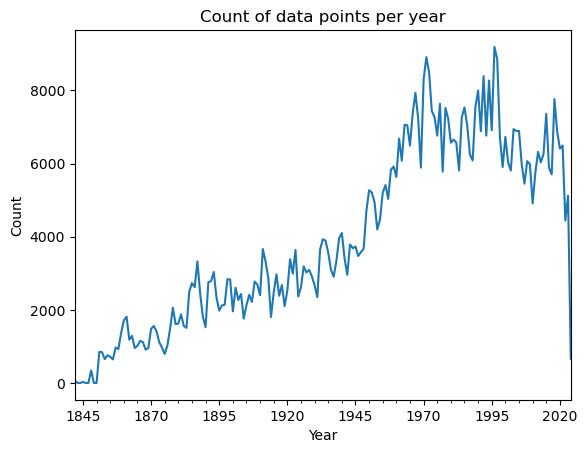

In [20]:
dfYear = df.resample('YS').count()

# plotting
plot = dfYear.SID.plot(kind = 'line')
plot.set_title('Count of data points per year')
plot.set_xlabel('Year')
plot.set_ylabel('Count')

plt.show()

### 12) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

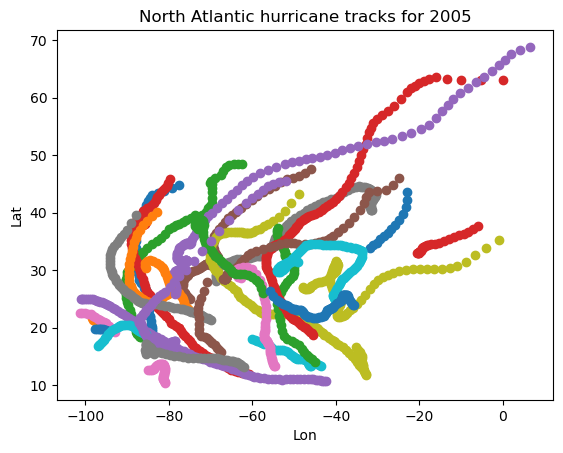

In [21]:
import matplotlib.colors as mcolors
# selecting all of the NA 2005 hurricanes
dfNA2005 = df[(df.BASIN == 'NA') & (df.SEASON == 2005)]

# grouping by SID so that we're able to plot individual tracks in the same color
dfNA2005gbSID = dfNA2005.groupby('SID')

# iterate through this group and assign colours
for key, group in dfNA2005gbSID:
    plot = plt.scatter(group.LON, group.LAT)

plt.title('North Atlantic hurricane tracks for 2005')
plt.xlabel('Lon')
plt.ylabel('Lat')

plt.show()

### 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

In [22]:
year = 1970
basin = 'NA'

dfFilt = df[(df.SEASON > year) & (df.BASIN == basin)]

dfFilt.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1971-07-04 12:00:00,1971186N34285,1971,64,NA,NA,ARLENE,TS,33.500,-75.5000,25.0,NaN
1971-07-04 15:00:00,1971186N34285,1971,64,NA,NA,ARLENE,TS,33.755,-75.3577,NaN,NaN
1971-07-04 18:00:00,1971186N34285,1971,64,NA,NA,ARLENE,TS,34.000,-75.2000,25.0,NaN
1971-07-04 21:00:00,1971186N34285,1971,64,NA,NA,ARLENE,TS,34.235,-75.0147,NaN,NaN
1971-07-05 00:00:00,1971186N34285,1971,64,NA,NA,ARLENE,TS,34.500,-74.8000,25.0,NaN


### 14) Plot the number of datapoints per day from this filtered dataframe

Make sure you figure is big enough to actually see the plot

Comment: This plot doesn't look great but I think that's maybe the point of this question? That aggregating is more useful for viewing?

<function matplotlib.pyplot.show(close=None, block=None)>

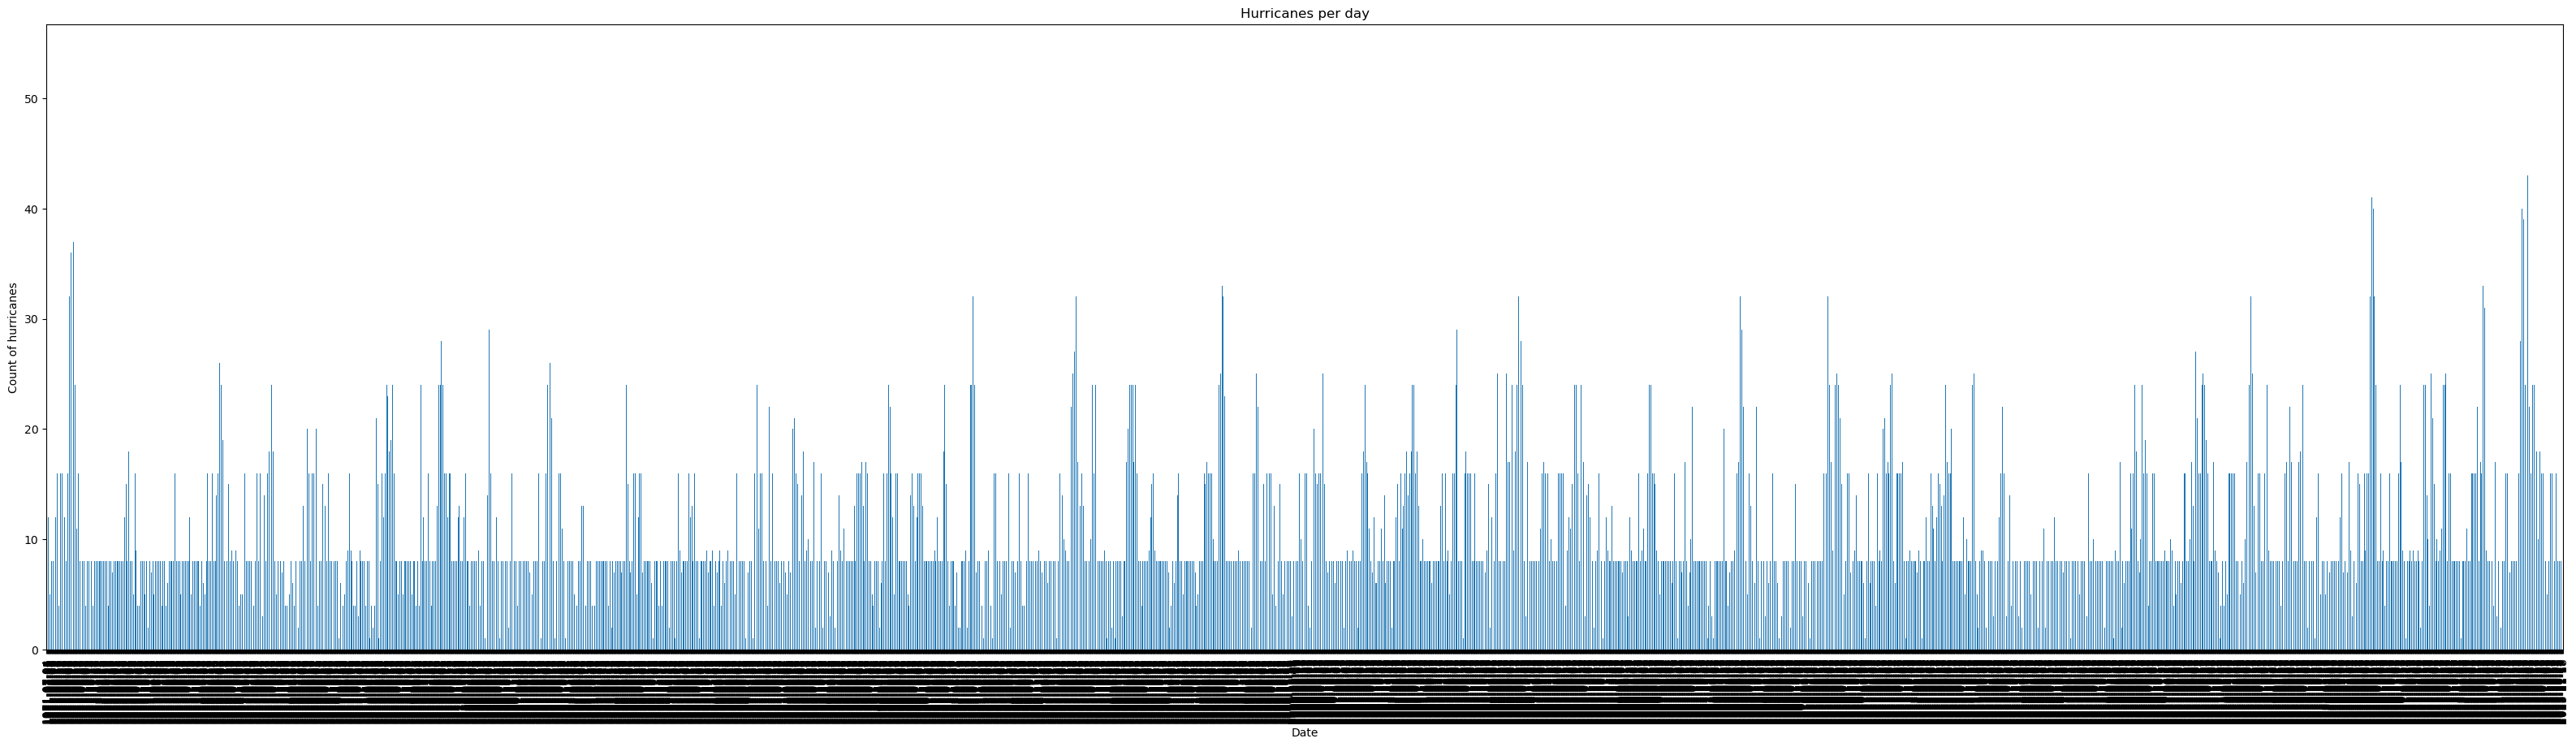

In [111]:
dfFiltDailyCount = dfFilt.groupby(dfFilt.index.date).count()

plot = dfFiltDailyCount.SID.plot(kind = 'bar', figsize = (40,10))
plt.title('Hurricanes per day')
plt.xlabel('Date')
plt.ylabel('Count of hurricanes')

plt.show

### 15) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

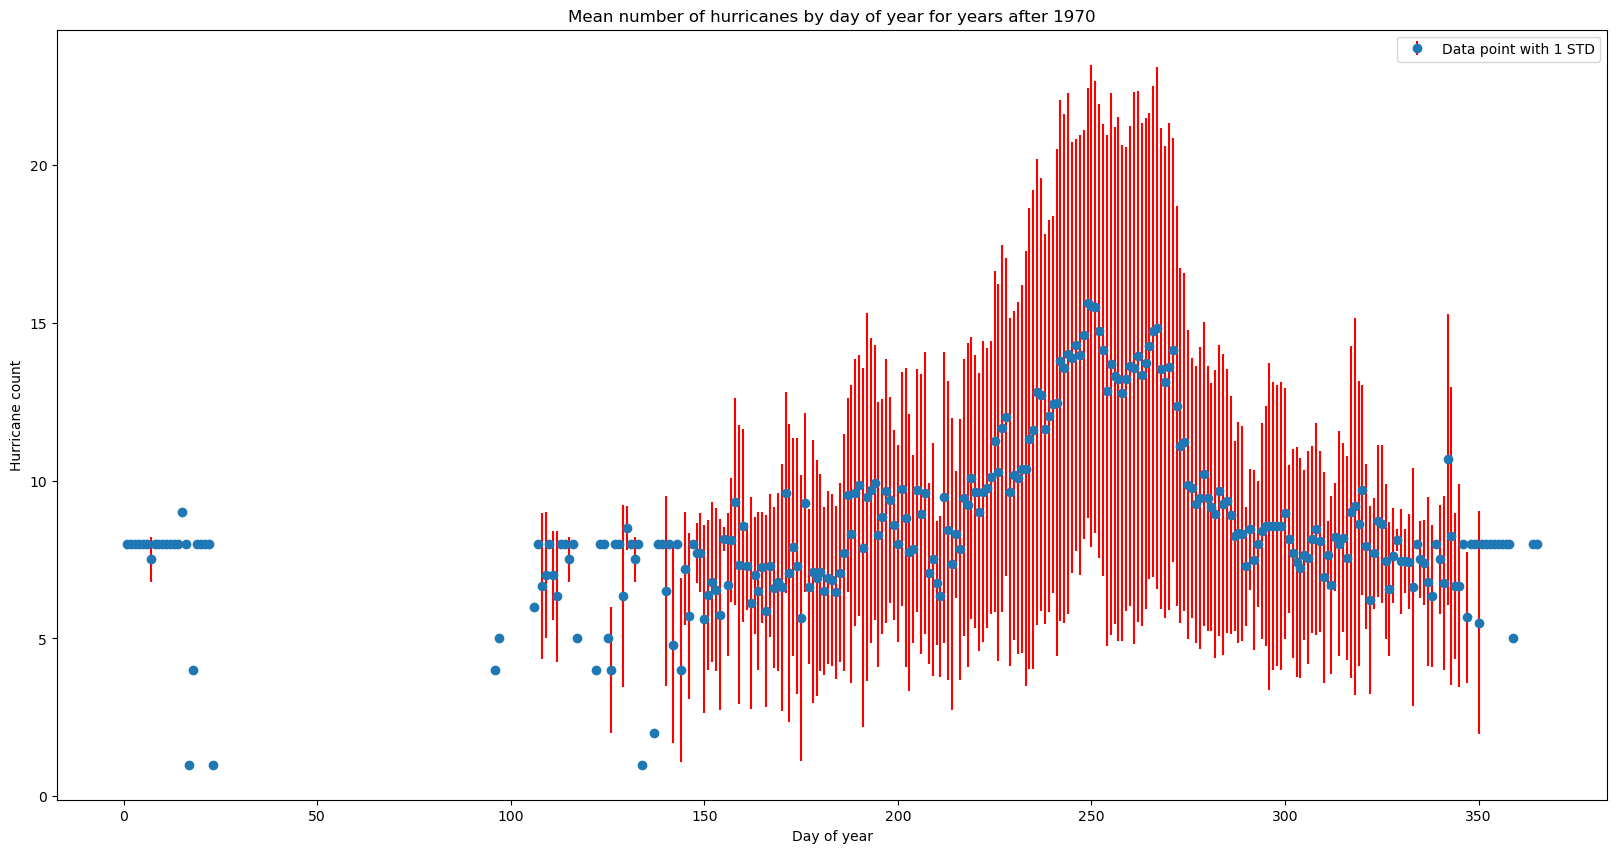

In [107]:
# grouping by day of year and year to enable calculation of the mean and std across years
dfFiltClimCount = dfFilt.groupby([dfFilt.index.dayofyear, dfFilt.index.year]).count()
dfFiltClimCount.index.names = ['DayOfYear','Year']
dfFiltClimCount = dfFiltClimCount.reset_index(level = 'Year')

# calculating mean and std
dfFiltClimCountMean = dfFiltClimCount.groupby(dfFiltClimCount.index).mean()
dfFiltClimCountStd = dfFiltClimCount.groupby(dfFiltClimCount.index).agg('std')

# plotting the figure
fig, ax = plt.subplots(figsize = (20,10))
plot = ax.errorbar(dfFiltClimCountMean.index, dfFiltClimCountMean.SID, dfFiltClimCountStd.SID, ecolor = 'r', fmt = 'o', label = 'Data point with 1 STD')
ax.set_title('Mean number of hurricanes by day of year for years after 1970')
ax.set_ylabel('Hurricane count')
ax.set_xlabel('Day of year')
plt.legend()

plt.show()

### 16) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

In [113]:
# first define a function to calculate the anomaly

def CalcAnomaly(x):
    '''
    Function that takes in a set of data, calculates the mean and std, subtracts the mean from every datapoint and normalises by std
    '''
    xAnom = (x - x.mean()) / x.std()
    return xAnom

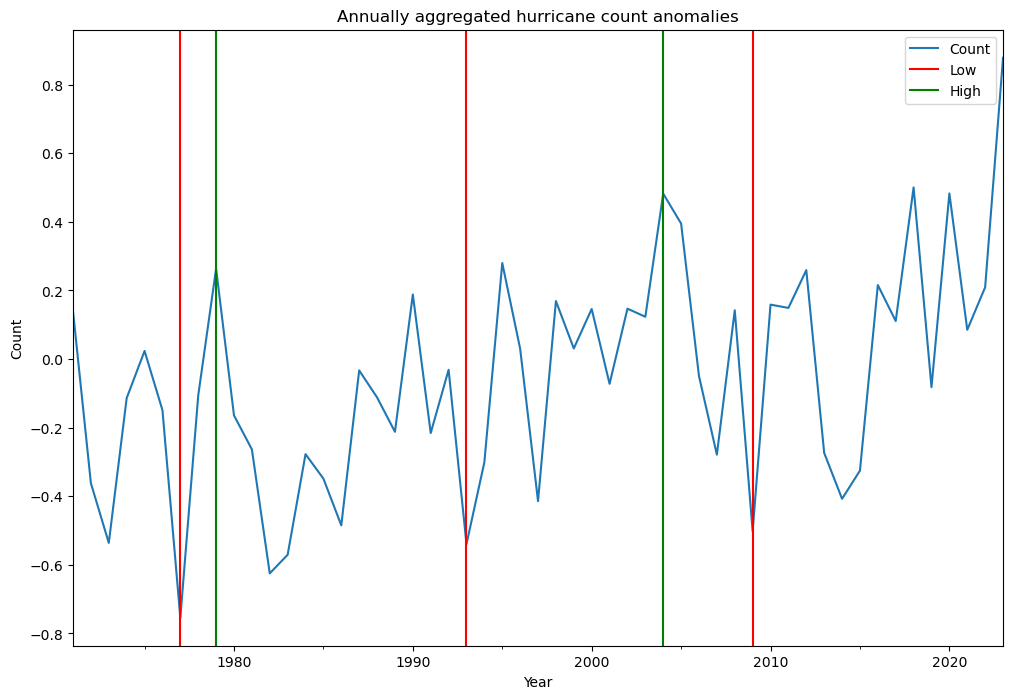

In [156]:
# Now apply this to the daily counts
# first get the counts per day
dfFiltCountDate = dfFilt.groupby(dfFilt.index.date).count()

# now make sure that the dates that are the indices are in the datetime format
dfFiltCountDate.index = pd.to_datetime(dfFiltCountDate.index)

# then apply the function to monthly grouped data
dfFiltMonthAnom = dfFiltCountDate.groupby(dfFiltCountDate.index.month).transform(CalcAnomaly)

# now resampling and plotting at annual resolution
dfFiltAnnualAnom = dfFiltMonthAnom.resample('YS').mean()

plot = dfFiltAnnualAnom.SID.plot(figsize = (12,8), label = 'Count')
plt.title('Annually aggregated hurricane count anomalies')
plt.xlabel('Year')
plt.ylabel('Count')
plt.axvline(x = '1977', color = 'r')
plt.axvline(x = '1993', color = 'r')
plt.axvline(x = '2009', color = 'r', label = 'Low')
plt.axvline(x = '1979', color = 'g')
plt.axvline(x = '2004', color = 'g', label = 'High')
plt.legend()

plt.show()

Which years stand out as having anomalous hurricane activity?

1977, 1993 and 2009 stand out as having low hurricane activity, while 1979 and 2004 stand out has having fairly high hurricane activity. However, the most notable feature is the apparent linear upward trend in the dataset. In order to assess whether those years are actually anomalously high or low we would need to 'detrend' the dataset (i.e.,  remove this linear trend).